In [8]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

In [9]:

cover = pd.read_csv("land_cover_data_11-30-2021.csv")

cover = cover[cover["Item"] == "Tree-covered areas"]
cover = cover.groupby(["Area", "Area Code (ISO3)", "Year"])["Value"].sum().reset_index()

cover = cover[(cover["Year"] == 2001) | (cover["Year"] == 2018)].reset_index()
cover = cover.pivot(index=["Area", "Area Code (ISO3)"], columns="Year", values="Value").reset_index()
cover["%change"] = ((cover[2018] - cover[2001])/ cover[2001])*100

cover.head()

Year,Area,Area Code (ISO3),2001,2018,%change
0,Afghanistan,AFG,554.8927,617.1694,11.223197
1,Albania,ALB,1397.3035,1562.2214,11.802583
2,Algeria,DZA,561.8261,867.6890,54.440849
3,American Samoa,ASM,0.0000,0.0000,NaN
4,Andorra,AND,41.0213,41.6223,1.465093


In [10]:
fires = pd.read_csv("fires_data_11-29-2021.csv")

fires = fires.groupby(["Area", "Area Code (ISO3)", "Year"])["Value"].sum().reset_index()

fires = fires[(fires["Year"] == 2001) | (fires["Year"] == 2018)].reset_index()
fires = fires.pivot(index=["Area", "Area Code (ISO3)"], columns="Year", values="Value").reset_index()
fires["%change"] = ((fires[2018] - fires[2001])/ fires[2001])*100

fires.replace([np.inf, -np.inf], np.nan, inplace=True)
fires.dropna(inplace=True)

fires.head()

Year,Area,Area Code (ISO3),2001,2018,%change
0,Afghanistan,AFG,9.016835e+02,8.160739e+02,-9.494418
1,Albania,ALB,7.950820e+03,6.059400e+03,-23.788995
2,Algeria,DZA,9.625480e+04,2.662371e+03,-97.234039
5,Angola,AGO,6.267062e+07,6.280184e+07,0.209379
8,Argentina,ARG,1.391189e+07,5.974105e+06,-57.057546


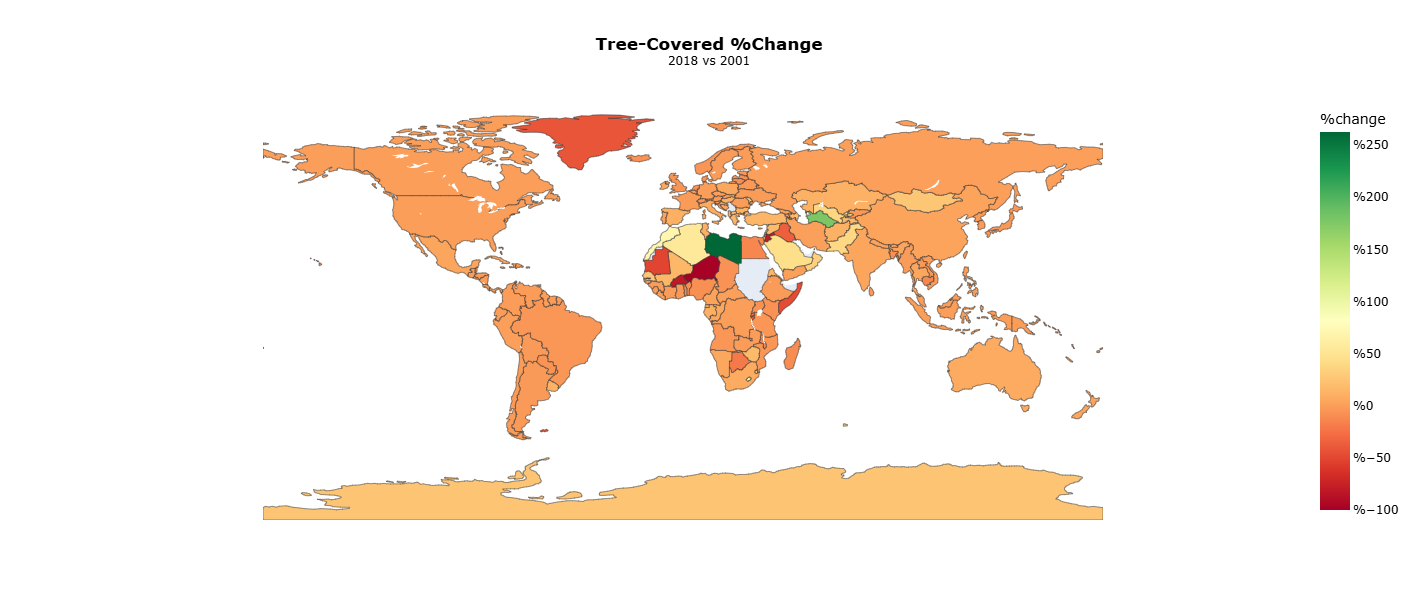

In [11]:
title = '<b>Tree-Covered %Change</b><br><sup>2018 vs 2001</sup>'
layout1 = go.Layout(title = {'text' : title, 
                            'x':0.5, 'xanchor': 'center'}, 
                   font = {"color" : 'black'},
                   width=980, height=600, plot_bgcolor="white", paper_bgcolor="white",
                   geo=dict(showframe=False, showcoastlines=False, projection_type='equirectangular'
                           )
                  )

fig1 = go.Figure(layout = layout1)

trace1 = go.Choropleth(
    locations = cover['Area Code (ISO3)'],
    z = cover['%change'],
    text = cover['Area'],
    colorscale = 'RdYlGn',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='#2E2E2E',
    marker_line_width=0.5,
    colorbar_tickprefix = '%',
    colorbar_title = '%change',
)

fig1.add_trace(trace1)

fig1.show()

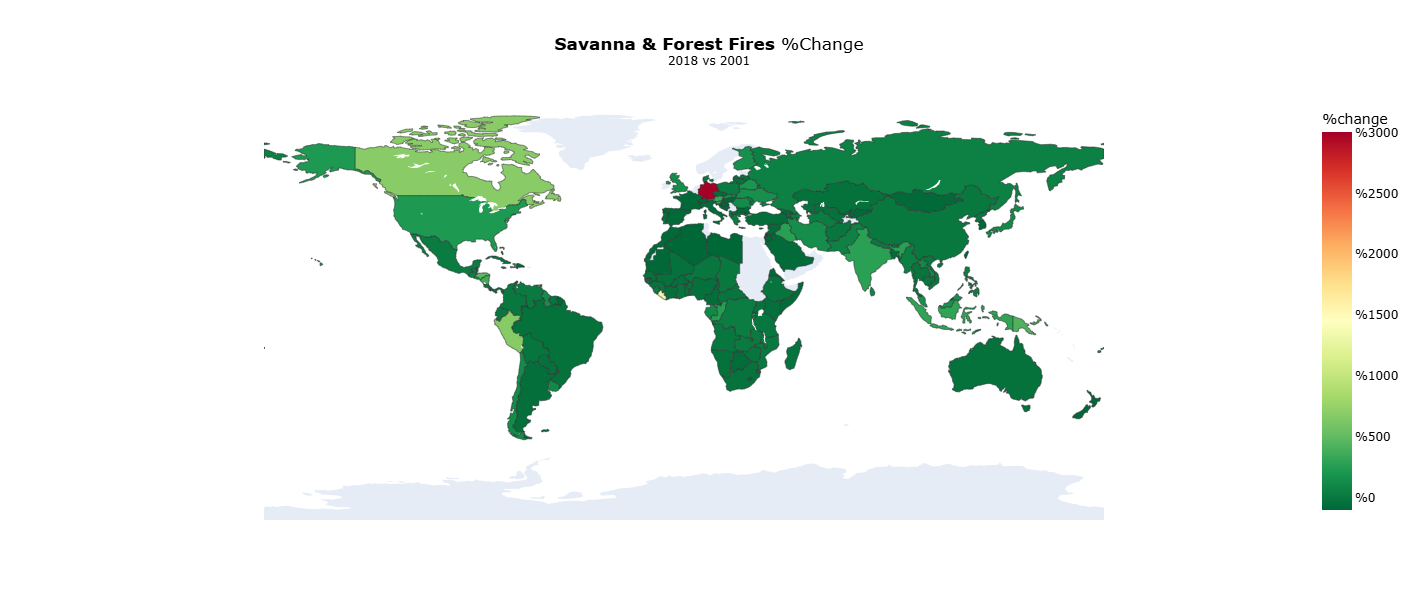

In [12]:
title = '<b>Savanna & Forest Fires</b> %Change<br><sup>2018 vs 2001</sup>'
layout2 = go.Layout(title = {'text' : title, 
                            'x':0.5, 'xanchor': 'center'}, 
                   font = {"color" : 'black'},
                   width=980, height=600, plot_bgcolor="white", paper_bgcolor="white",
                   geo=dict(showframe=False, showcoastlines=False, projection_type='equirectangular'
                           )
                  )

fig2 = go.Figure(layout = layout2)


trace2 = go.Choropleth(
    locations = fires['Area Code (ISO3)'],
    z = fires['%change'],
    text = fires['Area'],
    colorscale = 'RdYlGn',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='#2E2E2E',
    marker_line_width=0.5,
    colorbar_tickprefix = '%',
    colorbar_title = '%change',
)

fig2.add_trace(trace2)
fig2.show()

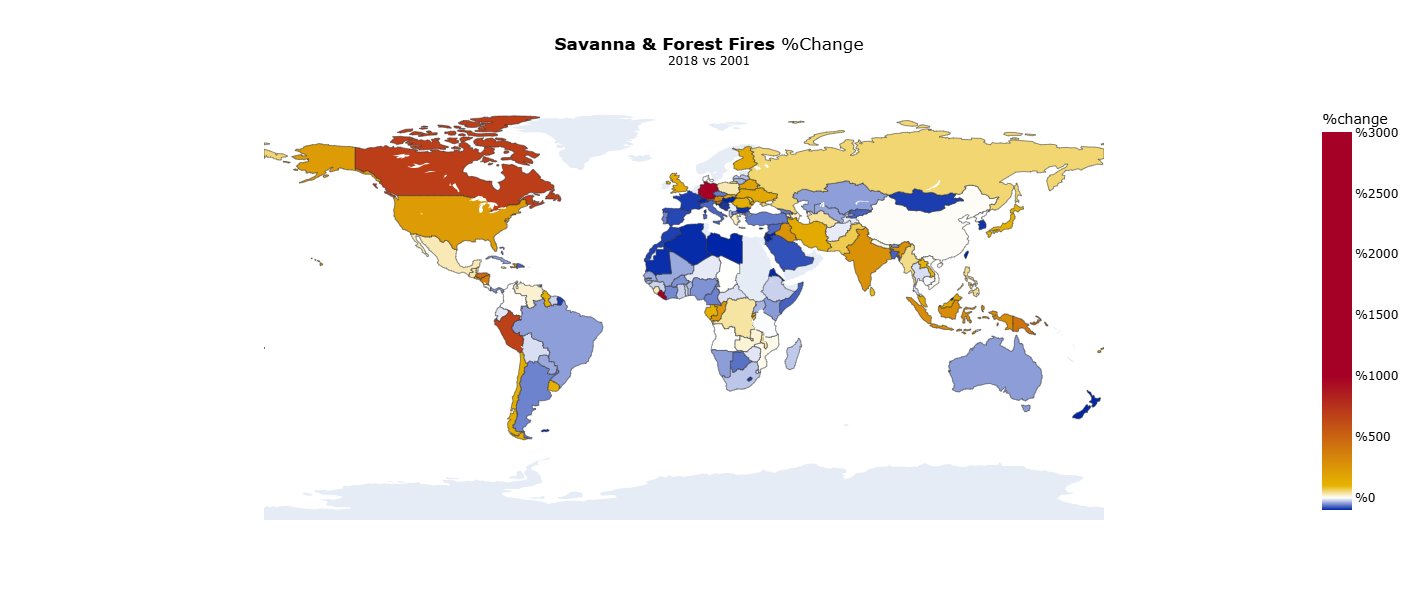

In [13]:
title = '<b>Savanna & Forest Fires</b> %Change<br><sup>2018 vs 2001</sup>'
layout2 = go.Layout(title = {'text' : title, 
                            'x':0.5, 'xanchor': 'center'}, 
                   font = {"color" : 'black'},
                   width=980, height=600, plot_bgcolor="white", paper_bgcolor="white",
                   geo=dict(showframe=False, showcoastlines=False, projection_type='equirectangular'
                           )
                  )

fig2 = go.Figure(layout = layout2)

zero = 100/(fires['%change'].max()-fires['%change'].min())
hundred = 200/(fires['%change'].max()-fires['%change'].min())
thousand = 1100/(fires['%change'].max()-fires['%change'].min())

cs =[[0, "rgb(165,0,38)"],[1-thousand, "rgb(165,0,38)"],[1-hundred, "rgb(230,180,0)"], [1-zero, "rgb(255,255,255)"], [1, "rgb(0,38,167)"]]
trace2 = go.Choropleth(
    locations = fires['Area Code (ISO3)'],
    z = fires['%change'],
    text = fires['Area'],
    colorscale = cs,
    autocolorscale=False,
    reversescale=True,
    marker_line_color='#2E2E2E',
    marker_line_width=0.5,
    colorbar_tickprefix = '%',
    colorbar_title = '%change',
)

fig2.add_trace(trace2)
fig2.show()